In [1]:

from matplotlib import font_manager
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="white", rc={"grid.color": "lightgray"})
plt.rc("axes", titlesize=16, titleweight="bold", labelsize=14, labelweight="bold")
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
FONT = font_manager.FontProperties(weight='bold')

# HalfCheetah

In [2]:
lambdas = {
    x: pd.read_csv(f"HalfCheetah/{x}.csv")
    for x in ["Run", "Control"]
}
lambdas_df = pd.DataFrame(columns=["Run", "Control"])
for i, weight in enumerate(lambdas.keys()):
    mean_key = [
        key
        for key in lambdas[weight].keys()
        if not (
            key.startswith("Step") or key.endswith("MAX") or key.endswith("MIN")
        )
    ][0]
    lambdas_df[weight] = lambdas[weight][mean_key]


In [3]:
gpi_ls_weights = pd.read_csv("HalfCheetah/gpi_ls_weights.csv")
pgmorl_weights = pd.read_csv("HalfCheetah/pgmorl_weights.csv")

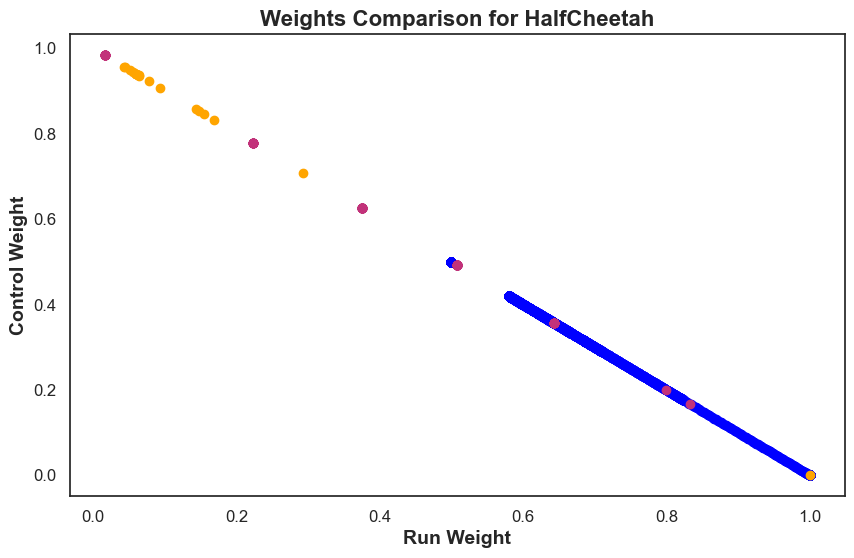

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(
    lambdas_df["Run"],
    lambdas_df["Control"],
    label="DYLAM",
    color="blue",
)
plt.scatter(
    gpi_ls_weights["Run"],
    gpi_ls_weights["Control"],
    label="GPI-LS",
    color="orange",
)
plt.scatter(
    pgmorl_weights["Run"],
    pgmorl_weights["Control"],
    label="PGMORL",
    color="#C2327A",
)
plt.xlabel("Run Weight")
plt.ylabel("Control Weight")
plt.title("Weights Comparison for HalfCheetah")
# plt.legend(prop=FONT)
plt.savefig("HalfCheetah/halfcheetah_weights_comparison.pdf", format="pdf", bbox_inches="tight")

# MineCart

In [5]:
dylam_weights = [pd.read_csv(f"minecart/dylam_weight_{i}.csv") for i in range(3)]
dylam_weights = [dylam_weights[i][f"env: MINECART - lambdas/component_{i}"] for i in range(3)]
dylam_weights = pd.DataFrame({"First_Minerium": dylam_weights[0], "Second_Minerium": dylam_weights[1], "Fuel": dylam_weights[2]})

In [6]:
gpi_ls_weights = pd.read_csv("minecart/gpi_ls_weights.csv")

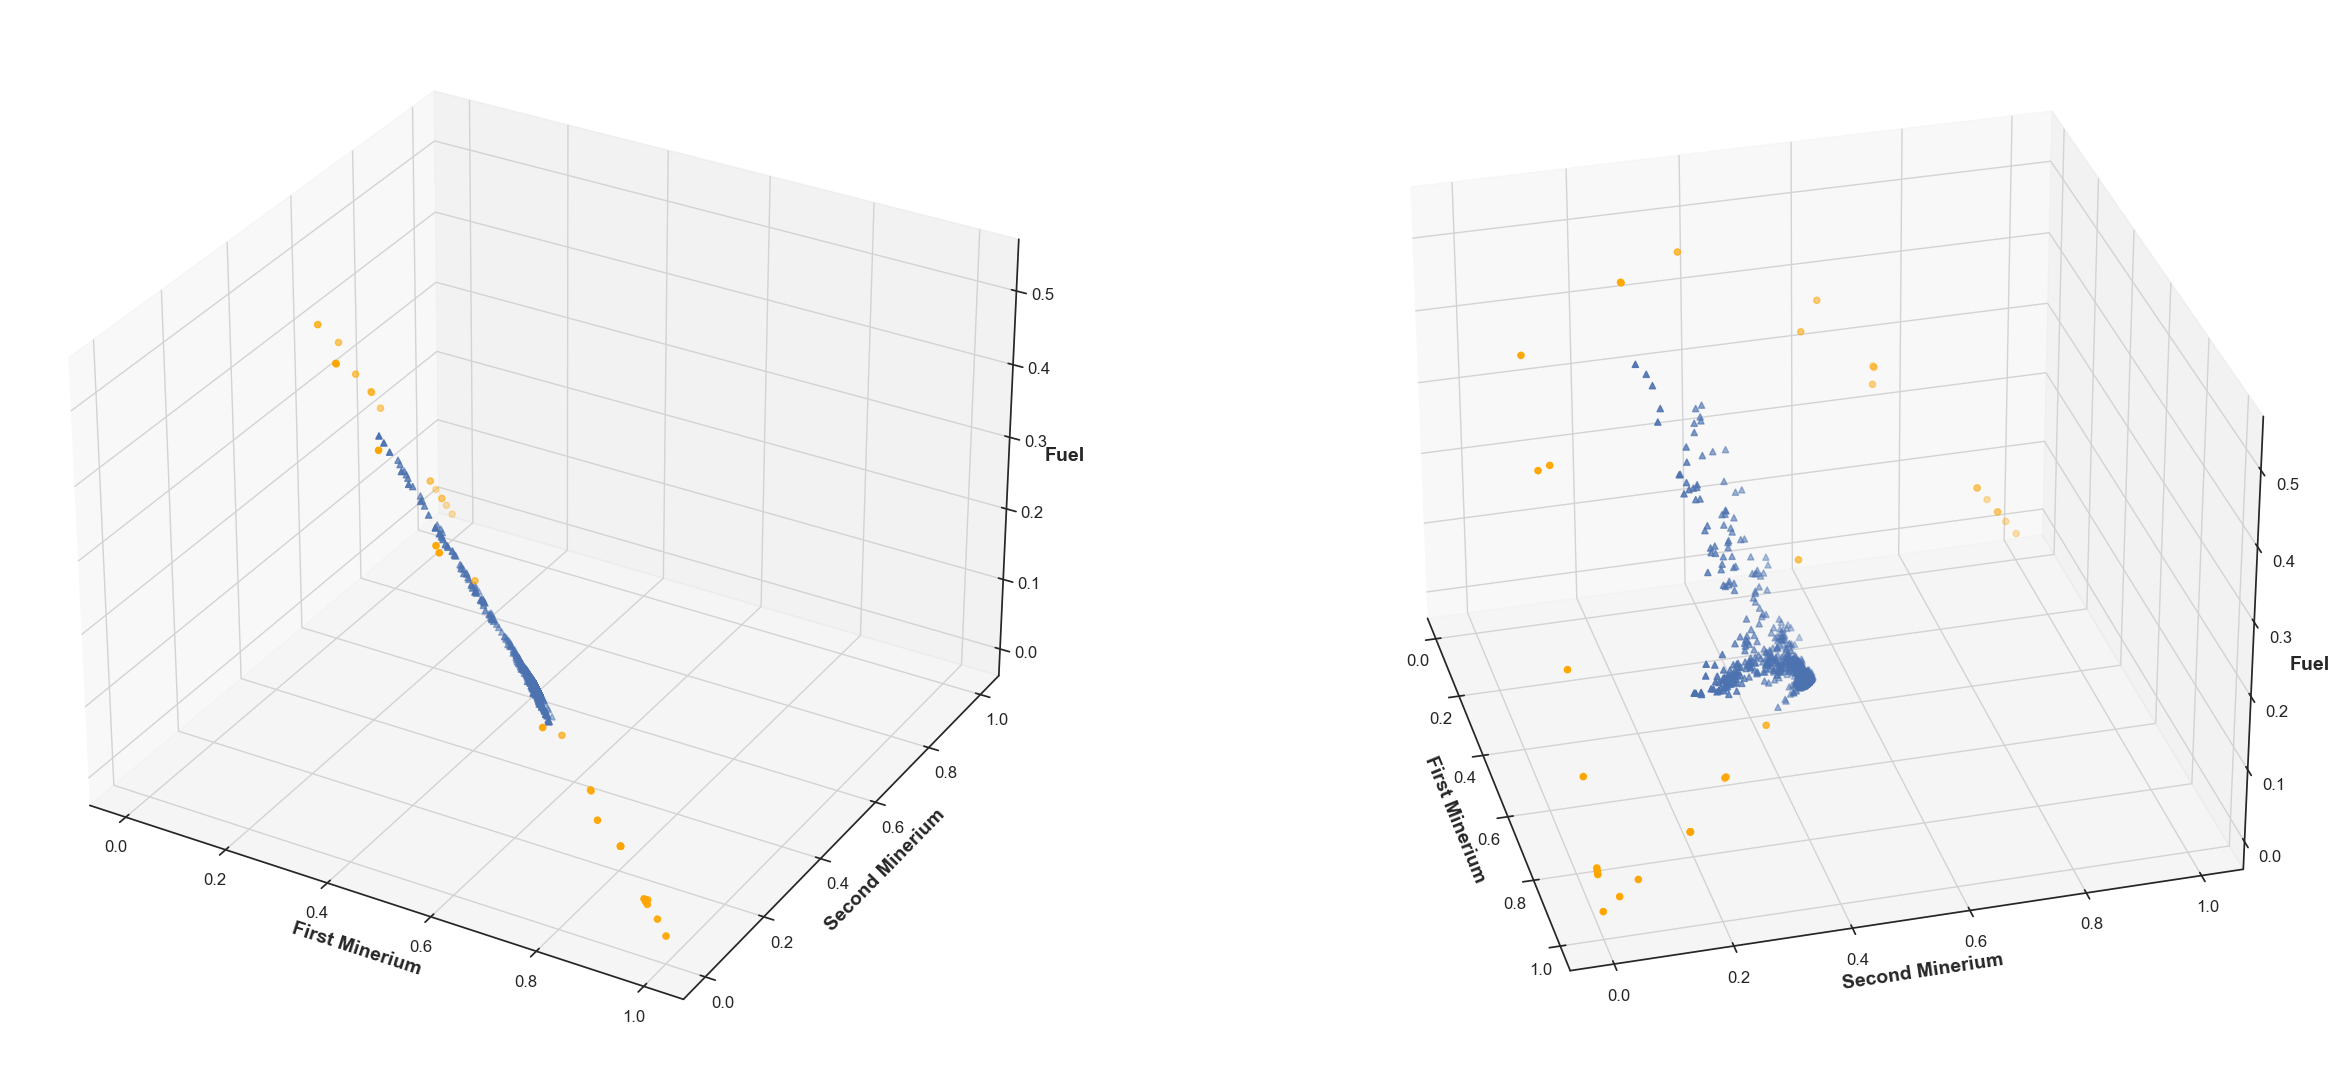

In [8]:
fig = plt.figure(figsize=(30, 15))
ax1 = fig.add_subplot(121, projection="3d")
ax1.set_xlabel("First Minerium")
ax1.set_ylabel("Second Minerium")
ax1.set_zlabel("Fuel")

ax1.scatter(
    dylam_weights["First_Minerium"],
    dylam_weights["Second_Minerium"],
    dylam_weights["Fuel"],
    c="b",
    marker="^",
    label="DYLAM",
)

ax1.scatter(
    gpi_ls_weights["First_Minerium"],
    gpi_ls_weights["Second_Minerium"],
    gpi_ls_weights["Fuel"],
    c="orange",
    marker="o",
    label="GPI-LS",
)

ax2 = fig.add_subplot(122, projection="3d")
ax2.set_xlabel("First Minerium")
ax2.set_ylabel("Second Minerium")
ax2.set_zlabel("Fuel")

ax2.scatter(
    dylam_weights["First_Minerium"],
    dylam_weights["Second_Minerium"],
    dylam_weights["Fuel"],
    c="b",
    marker="^",
    label="DYLAM",
)

ax2.scatter(
    gpi_ls_weights["First_Minerium"],
    gpi_ls_weights["Second_Minerium"],
    gpi_ls_weights["Fuel"],
    c="orange",
    marker="o",
    label="GPI-LS",
)

ax2.view_init(elev=30, azim=-15)  # Custom view

plt.savefig("minecart/minecart_weights_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()